# 2.4 EDA and data prepare for Regression


In [2]:
import pandas as pd
import numpy as np

## 2.2 Data preparation

In [9]:
df = pd.read_csv('data.csv')
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5806,Acura,ILX,2016,premium unleaded (recommended),201.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Compact,Sedan,36,25,204,32900
5798,Acura,ILX,2015,premium unleaded (recommended),201.0,4.0,MANUAL,front wheel drive,4.0,"Luxury,Performance",Compact,Sedan,31,22,204,29350
11348,Nissan,Versa,2015,regular unleaded,109.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,40,31,2009,16890
648,BMW,6 Series,2015,premium unleaded (required),315.0,6.0,AUTOMATIC,all wheel drive,2.0,"Luxury,Performance",Midsize,Coupe,29,20,3916,79100
3531,Aston Martin,DB9,2015,premium unleaded (required),510.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Midsize,Coupe,19,13,259,198295


In [6]:
# df.columns

In [11]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [36]:
# from collections import Counter
# df1 = pd.DataFrame.from_dict(dict(Counter(df.make)), orient='index', columns=[, 'make', 'count'])
# # df.make
# df1

In [35]:
# dict(Counter(df.make))
df['make'].groupby(df['make']).count()

make
Acura             252
Alfa Romeo          5
Aston Martin       93
Audi              328
BMW               334
Bentley            74
Bugatti             3
Buick             196
Cadillac          397
Chevrolet        1123
Chrysler          187
Dodge             626
FIAT               62
Ferrari            69
Ford              881
GMC               515
Genesis             3
HUMMER             17
Honda             449
Hyundai           303
Infiniti          330
Kia               231
Lamborghini        52
Land Rover        143
Lexus             202
Lincoln           164
Lotus              29
Maserati           58
Maybach            16
Mazda             423
McLaren             5
Mercedes-Benz     353
Mitsubishi        213
Nissan            558
Oldsmobile        150
Plymouth           82
Pontiac           186
Porsche           136
Rolls-Royce        31
Saab              111
Scion              60
Spyker              3
Subaru            256
Suzuki            351
Tesla              18
Toyot

In [8]:
df['make'].str.lower().str.replace(' ', '_')

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: str

In [7]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

[]

In [8]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [9]:
df.dtypes

make                     str
model                    str
year                   int64
engine_fuel_type         str
engine_hp            float64
engine_cylinders     float64
transmission_type        str
driven_wheels            str
number_of_doors      float64
market_category          str
vehicle_size             str
vehicle_style            str
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [38]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='str')

## 2.3 Exploratory data analysis

In [39]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
<StringArray>
['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler']
Length: 5, dtype: str
48

model
<StringArray>
['1 Series M', '1 Series', '100', '124 Spider', '190-Class']
Length: 5, dtype: str
915

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
<StringArray>
[   'premium unleaded (required)',               'regular unleaded',
 'premium unleaded (recommended)',       'flex-fuel (unleaded/E85)',
                         'diesel']
Length: 5, dtype: str
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
<StringArray>
['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE', 'UNKNOWN']
Length: 5, dtype: str
5

driven_wheels
<StringArray>
['rear wheel drive', 'front wheel drive', 'all wheel drive',
 'four wheel drive']
Length: 4, dtype: str
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
<StringArray>
['Factory Tuner,Luxury,High-Performance',
                    'Luxury,Performance',
               'Luxury,High-Pe

In [11]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


Distribution of price

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

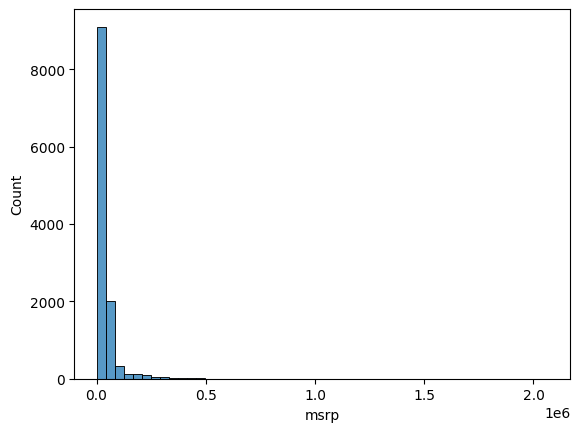

In [43]:
sns.histplot(df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

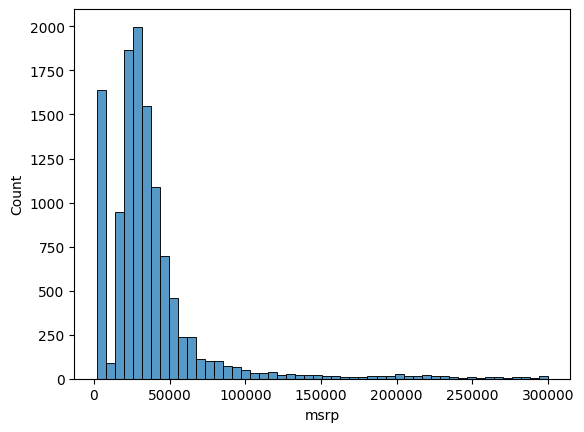

In [52]:
sns.histplot(df.msrp[df.msrp < 300000], bins=50)
# df.msrp[df.msrp < 300000].shape

In [15]:
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [16]:
np.log([0 + 1, 1+ 1, 10 + 1, 1000 + 1, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51292546])

In [17]:
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

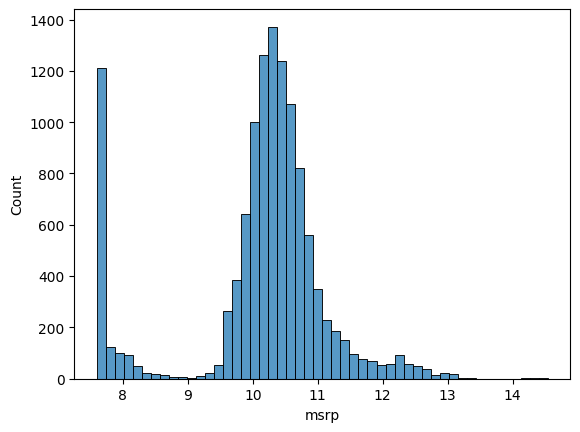

In [18]:

sns.histplot(price_logs, bins=50)

Missing values

In [19]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 Setting up the validation framework

Let's draw it

In [20]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [21]:
n

11914

In [22]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [23]:
df.iloc[[10, 0, 3, 5]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,BMW,1 Series,2013,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39600
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200


In [24]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [25]:
idx = np.arange(n)

In [26]:
np.random.seed(2)
np.random.shuffle(idx)

In [27]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [28]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,Chevrolet,Cobalt,2008,regular unleaded,148.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,33,24,1385,14410
6720,Toyota,Matrix,2012,regular unleaded,132.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,32,25,2031,19685
5878,Subaru,Impreza,2016,regular unleaded,148.0,4.0,AUTOMATIC,all wheel drive,4.0,Hatchback,Compact,4dr Hatchback,37,28,640,19795
11190,Volkswagen,Vanagon,1991,regular unleaded,90.0,4.0,MANUAL,rear wheel drive,3.0,NaN,Large,Passenger Minivan,18,16,873,2000
4554,Ford,F-150,2017,flex-fuel (unleaded/E85),385.0,8.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Large,Crew Cab Pickup,21,15,5657,56260


In [29]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [30]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [31]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [32]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [33]:
len(y_train)

7150

## 2.5 Linear regression

draw

In [34]:
df_train.iloc[10]

make                                 Rolls-Royce
model                     Phantom Drophead Coupe
year                                        2015
engine_fuel_type     premium unleaded (required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      AUTOMATIC
driven_wheels                   rear wheel drive
number_of_doors                              2.0
market_category        Exotic,Luxury,Performance
vehicle_size                               Large
vehicle_style                        Convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [35]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [36]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [37]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [38]:
linear_regression(xi)

12.312

In [39]:
np.expm1(12.312)

np.float64(222347.2221101062)

In [40]:
np.log1p(222347.2221101062)

np.float64(12.312)

## 2.6 Linear regression vector form

In [41]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [42]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [43]:
w_new = [w0] + w

In [44]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [45]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [46]:
linear_regression(xi)

12.312

In [47]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [48]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [49]:
def linear_regression(X):
    return X.dot(w_new)

In [50]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## 2.7 Training a linear regression model

In [51]:
def train_linear_regression(X, y):
    pass

In [52]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [53]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [54]:
X = np.column_stack([ones, X])

In [55]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [56]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [57]:
w0 = w_full[0]
w = w_full[1:]

In [58]:
w0, w

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

In [59]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [60]:
train_linear_regression(X, y)

LinAlgError: Singular matrix

## 2.8 Car price baseline model

In [61]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='str')

In [62]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [63]:
w0

np.float64(7.927257388069986)

In [64]:
w

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

<Axes: ylabel='Count'>

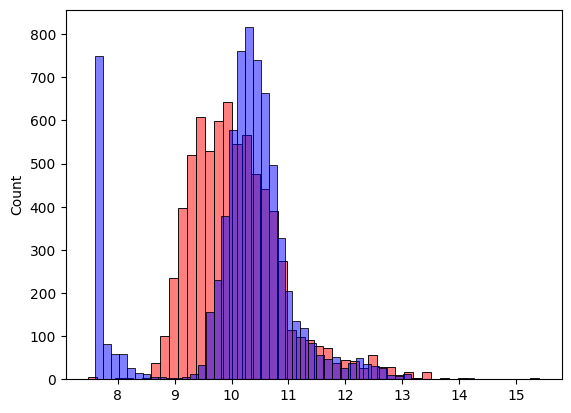

In [65]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)


## 2.9 RMSE

In [66]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [67]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

## 2.10 Validating the model

In [68]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [69]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.761653099130156)

## 2.11 Simple feature engineering

In [70]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [71]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5172055461058299)

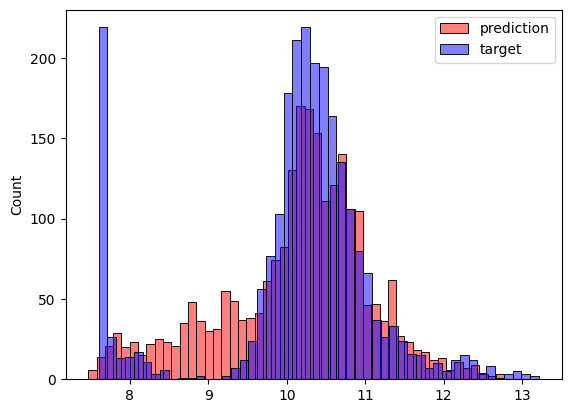

In [72]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

## 2.12 Categorical variables

In [73]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [74]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [75]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(53.70370772576197)

In [76]:
w0, w

(np.float64(120883643437600.25),
 array([ 1.97815705e-01,  3.59996839e+00,  1.77430262e-01,  2.54401440e+00,
        -3.91209144e-04,  1.31841741e+00, -1.87629844e+03, -1.87912990e+03,
        -1.87135179e+03, -3.16525752e+00,  8.11185787e-01,  8.76573747e+00,
        -7.26348843e+00, -5.87324602e+00, -3.43160292e+01, -2.49085861e+01,
        -4.50399871e+01, -2.85752551e+01,  9.63377197e+00,  3.79004788e+02,
         3.54982604e+02,  3.73756735e+02,  4.23480737e+02,  3.19067990e+02,
        -1.20883643e+14, -1.20883643e+14, -1.20883643e+14, -1.20883643e+14,
        -2.07609706e-01, -6.37629899e-01, -4.67620395e-01,  2.49283098e+01,
         4.01327473e+00, -2.32017237e+01, -2.26915593e+01, -5.85429953e+00,
        -1.44115660e-01, -2.62579827e-02,  1.75913981e-01,  3.65037816e-01,
        -2.90235596e-01]))

## 2.13 Regularization

In [77]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001],
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [78]:
y= [1, 2, 3, 1, 2, 3]

In [79]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [80]:
XTX_inv = np.linalg.inv(XTX)

LinAlgError: Singular matrix

In [ ]:
XTX_inv

In [ ]:
XTX_inv.dot(X.T).dot(y)

In [ ]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [ ]:
np.linalg.inv(XTX)

In [ ]:
XTX = XTX + 0.01 * np.eye(3)

In [ ]:
np.linalg.inv(XTX)

In [ ]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [ ]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

## 2.14 Tuning the model

In [ ]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

In [ ]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

## 2.15 Using the model

In [ ]:
df_full_train = pd.concat([df_train, df_val])

In [ ]:
df_full_train = df_full_train.reset_index(drop=True)

In [ ]:
X_full_train = prepare_X(df_full_train)

In [ ]:
X_full_train

In [ ]:
y_full_train = np.concatenate([y_train, y_val])

In [ ]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [ ]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

In [ ]:
car = df_test.iloc[20].to_dict()
car

In [ ]:
df_small = pd.DataFrame([car])
df_small

In [ ]:
X_small = prepare_X(df_small)

In [ ]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

In [ ]:
np.expm1(y_pred)

In [ ]:
np.expm1(y_test[20])

## 2.16 Next steps

* We included only 5 top features. What happens if we include 10?

Other projects

* Predict the price of a house - e.g. boston dataset
* https://archive.ics.uci.edu/ml/datasets.php?task=reg
* https://archive.ics.uci.edu/ml/datasets/Student+Performance

## 2.17 Summary

* EDA - looking at data, finding missing values
* Target variable distribution - long tail => bell shaped curve
* Validation framework: train/val/test split (helped us detect problems)
* Normal equation - not magic, but math
* Implemented it with numpy
* RMSE to validate our model
* Feature engineering: age, categorical features
* Regularization to fight numerical instability